In [12]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Implementar uma versão do algoritmo Simplex

### Problema de Otimização:
$$ \text{Minimizar} \qquad \int_{0}^{10} |a(s)|ds \qquad \text{s.a.}$$

$$ \qquad v(t) = v(0) + \int_{0}^{t} a(s)ds \qquad \forall t \in [0,10]$$

$$\qquad x(t) = x(0) + \int_{0}^{t}v(s)ds \qquad \forall t \in [0,10]$$

$$\qquad x(0) = 0, x(10)=1, v(0)=0, v(10)=0$$

Verifica-se que a função custo é não-linear devido a presença de um módulo, além disso, o problema necessita ser discretizado.


***

Tomando um passo de discretização $\Delta t$, temos que $T=N\Delta t$, onde $T=10$ e $N$ é um número inteiro que irá particionar o intervalo de tempo dado por $[0,T]=[0,10]$.

Ou seja, se nosso passo de discretização é dado por $\Delta t =1$, então temos que $N=\frac{T}{\Delta t}=\frac{10}{1}=10$, e teremos nosso intervalo discretizado em 10 partições. 

Podemos reescrever $x(t)$, $v(t)$ e a(t) como:

$$x = [x_0=x(0), x_1=x(1 \cdot 1), ..., x_{10} = x(10 \cdot 1)]$$

$$v = [v_0=v(0), v_1 = v(1 \cdot 1), ... , v_{10} = v(10 \cdot 1)] $$

Tomando valores genéricos de $N$ e $\Delta t$, temos:

$$x = [x_0=x(0), x_1=x(1 \cdot \Delta t), ..., x_{N} = x(N \cdot \Delta t)]$$

$$v = [v_0=v(0), v_1 = v(1 \cdot \Delta t), ... , v_{N} = v(N \cdot \Delta t)] $$

Contudo, também podemos escrever as atualizações como,

$$x_{k+1} = x_{k} + v_k\Delta t, \qquad {k \in \{0,..., N-1\}}$$

$$v_{k+1} = v_{k} + a_k\Delta t, \qquad {k \in \{0,..., N-1\}}$$

Portanto, o problema de minimização teria se tornado:

$$ \text{Minimizar} \qquad \int_{0}^{10} |a(s)|ds \qquad \text{s.a.}$$

$$ \qquad v_{k+1} = v_k + a_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$ \qquad x_{k+1} = x_k + v_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$\qquad x(0) = 0, x(10)=1, v(0)=0, v(10)=0$$

Mas ainda assim temos uma função custo não linear devido a presença da função $f(\cdot)= |\cdot|$ e que ainda não está discretizada.

Podemos, no entanto, discretizar a integral tal que, $$z = \int_0 ^{T} |a(s)|ds \longrightarrow z = \sum_{k=0}^{N-1} |a_k| \Delta t = \Delta t \sum_{k=0}^{N-1} |a_k| $$

E nosso problema de minimização se torna,

Portanto, o problema de minimização teria se tornado:

$$ \text{Minimizar} \qquad  z = \Delta t \sum_{k=0}^{N-1} |a_k|  \qquad \text{s.a.}$$

$$ \qquad v_{k+1} = v_k + a_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$ \qquad x_{k+1} = x_k + v_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$\qquad x(0) = 0, x(10)=1, v(0)=0, v(10)=0$$

Para linearizar o problema, inserimos novas variáveis $\theta_k, k \in \{0,...,N-1 \}$ e o problema de programação linear se torna,


$$ \text{Minimizar} \qquad  z = \Delta t \sum_{k=0}^{N-1} \theta_k  \qquad \text{s.a.}$$

$$ \qquad v_{k+1} = v_k + a_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$ \qquad x_{k+1} = x_k + v_k \Delta t \qquad k \in \{0,..., N-1\}$$

$$ \qquad a_k - \theta_k \leq 0 \qquad k \in \{0,..., N-1\}$$

$$ \qquad -a_k - \theta_k \leq 0 \qquad k \in \{0,..., N-1\}$$

$$ \qquad x(0) = 0 \qquad v(0)=0$$
$$ \qquad x(N-1)=1 \qquad v(N-1)=0$$

___

Para transformamos o problema em uma forma "resolvível", basta escrevermos cada iteração k, tal que,

<b>k = 0</b>

$$
x_0 = 0 \qquad v_0 = 0 \qquad a_0 - \theta_0 \leq 0 \qquad -a_0 - \theta_0 \leq 0
$$

<b>k = 1:</b>

$$
x_1 = 0 \qquad
v_1 = a_0 \cdot \Delta t \qquad
a_1 - \theta_1 \leq 0
-a_1 - \theta_1 \leq 0
$$

<b>k=2:</b>

$$
x_2 = a_0 \cdot \Delta t ^2 \qquad
v_2 = (a_0 + a_1) \cdot \Delta t \qquad
a_2 - \theta_2 \leq = 0 \qquad
-a_2 - \theta_2 \leq = 0 
$$

<b>k=3:</b>

$$
x_3 = (2a_0 + a_1) \cdot \Delta t ^2 \qquad
v_3 = (a_0 + a_1 + a_2) \cdot \Delta t \qquad
a_3 - \theta_3 \leq = 0 \qquad
-a_3 - \theta_3 \leq = 0 
$$

Contudo, tomando a nossa última iteração, nós conseguimos generalizar o problema, sendo assim, temos:

<b>k = N - 1:</b>

$$
x_{N-1} = 1 \implies
1 = \Delta t ^2 \cdot \sum_{i=0}^{N-2}(N-1-i)\cdot a_{i} 
\\
v_{N-1} = 0 \implies
0 = \Delta t \cdot \sum_{i=0}^{N-1}a_i
\\
a_2 - \theta_2 \leq = 0 \\
-a_2 - \theta_2 \leq = 0 
$$

E o problema completo de programação linear se torna o seguinte, 

$$ \text{Minimizar} \qquad  z = \Delta t \sum_{k=0}^{N-1} \theta_k  \qquad \text{s.a.}\\
\qquad 1 = \Delta t ^2 \cdot \sum_{i=0}^{N-2}(N-1-i)\cdot a_{i} \\
\qquad 0 = \Delta t \cdot \sum_{i=0}^{N-1}a_i \\
\qquad a_k - \theta_k \leq = 0 \qquad k \in \{0,1,...,(N-1) \}\\
\qquad -a_k - \theta_k \leq = 0 \qquad k \in \{0,1,...,(N-1) \}
$$

In [13]:
def inequalities(N, T, theta_k=1, a_k=1):
    matrix_A = []
    
    for i in range(0,N):
        rest_1 = [-theta_k if x == i else 0 for x in range(0,N)] + [ a_k if x == i else 0 for x in range(0, N)]
        rest_2 = [-theta_k if x == i else 0 for x in range(0,N)] + [-a_k if x == i else 0 for x in range(0, N)]
        
        matrix_A.append(rest_1)
        matrix_A.append(rest_2)
        
    return matrix_A

def cost(N, T, theta_k=1):
    dt = T/N
    return [dt*theta_k for i in range(0,N)] + [0 for i in range(0,N)]

def position_restriction(N,T, a_k=1):
    dt = T/N
    return [0 for i in range (0, N)] + [dt**2 *(N-1-i)*a_k for i in range(0,N-1)] + [0]

def velocity_restriction(N,T, a_k=1):
    dt = T/N
    return [0 for i in range(0,N)] + [dt*a_k for i in range(0, N)]

def basic(N,T):
    b = [0 for i in range(0,2*(N+1)+1)]
    b[-1] = 1
    return b

def add_artificial(N,T):
    rest_0 = [0 for i in range(0, 2*(N+1))]
    restriction_list = [rest_0]
    
    for i in range(0,2*(N+1)):
        rest = [1 if i == x else 0 for x in range(0,2*(N+1))]
        restriction_list.append(rest)
    return restriction_list

def create_lpp(N, T, theta_k=1, a_k=1):
    # Lembrar de tirar o rounding depois
    tableau = np.round([cost(N,T,theta_k)] + inequalities(N,T, theta_k, a_k) + [velocity_restriction(N,T, a_k)] + [position_restriction(N,T, a_k)], 1)
    df = pd.DataFrame(tableau, 
                      columns=['theta_{}'.format(x) if x < N else 'a_{}'.format(x-N) for x in range(0,2*N)])
    
    df = pd.concat([pd.DataFrame(basic(N,T), columns=['b']), df], axis=1)
    df = pd.concat([df, pd.DataFrame(add_artificial(N,T), columns=['c_{}'.format(i) for i in range(0,2*(N+1))])], axis=1)
    df = df.rename(index={0:'Custos'})
    return df

In [20]:
N = 4  # <- Número de discretizações
T = 10 # <- Tamanho total do intervalo

df = create_lpp(N,T) # <- Função que cria o tableau em formato de DataFrame
df

,b,theta_0,theta_1,theta_2,theta_3,a_0,a_1,a_2,a_3,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9
Custos,0,2.5,2.5,2.5,2.5,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
2,0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0
3,0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0
4,0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
5,0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0
6,0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0
7,0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0
8,0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0
9,0,0.0,0.0,0.0,0.0,2.5,2.5,2.5,2.5,0,0,0,0,0,0,0,0,1,0


In [21]:
# - Transformando de dataframe para lista para poder rodar o meu Simplex implementado no Simplex.py

c = df.drop(['b'], axis=1).iloc[0].as_matrix().tolist()
b = df['b'][1:].as_matrix().tolist()
A = df.drop(['b'], axis=1)[1:].as_matrix().tolist()

In [73]:
from Simplex import simplex

simplex(c,A,b, verbose=True)[1:]

Iteração 1:
[[  0.           1.42857143   1.42857143   1.42857143   1.42857143
    1.42857143   1.42857143   1.42857143  -1.42857143  -1.42857143
   -1.42857143  -1.42857143  -1.42857143  -1.42857143  -1.42857143   0.
    0.        ]
 [  0.          -1.42857143  -1.42857143  -1.42857143  -1.42857143
   -1.42857143  -1.42857143  -1.42857143   1.42857143   1.42857143
    1.42857143   1.42857143   1.42857143   1.42857143   1.42857143  -1.
    0.        ]
 [ -1.         -12.24489796 -10.20408163  -8.16326531  -6.12244898
   -4.08163265  -2.04081633  -0.          12.24489796  10.20408163
    8.16326531   6.12244898   4.08163265   2.04081633  -0.           0.
   -1.        ]]
O pivô está na linha 1 e coluna 8 

Iteração 2:
[[  0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.          -1.           0.        ]
 [  0.          -1.          -1.          -1.          -1.   

'Problema ilimitado'

Portanto, a modelagem acima não funciona, e pode-se ver que isso se dá pois não existirão acelerações negativas devido às restrições de $\theta_k \geq$ 0 $\forall$ k.

### Remodelando o problema de outra forma

Podemos tomar o modelo,

$$ \text{Minimizar} \qquad  z = \Delta t \sum_{k=0}^{N-1} |a_k|  \qquad \text{s.a.}\\
\qquad 1 = \Delta t ^2 \cdot \sum_{i=0}^{N-2}(N-1-i)\cdot a_{i} \\
\qquad 0 = \Delta t \cdot \sum_{i=0}^{N-1}a_i \\
$$

Podemos somar e subtrair as variáveis $a_k^+$ e $a_k^-$ e o problema poderá ser escrito como,

$$ \text{Minimizar} \qquad  z = \Delta t \sum_{k=0}^{N-1} (a_k^+ - a_k^-)  \qquad \text{s.a.}\\
\qquad \Delta t ^2 \cdot \sum_{i=0}^{N-2}(N-1-i)\cdot a_{i}^+ - \Delta t ^2 \cdot \sum_{i=0}^{N-2}(N-1-i)\cdot a_{i}^- = 1\\
\qquad \Delta t \cdot \sum_{i=0}^{N-1}a_i^+ - \Delta t \cdot \sum_{i=0}^{N-1}a_i^- = 0\\
\qquad a_i^+, a_i^- \geq 0 \ \forall i \in \{0,...,N-1\}
$$

In [88]:
def lpp_problem(T, N):
    a_1u = a_1b = 1 # <- aqui eu denomino a_i^+ e a_i^- por a_iu e a_ib, respectivamente, para ficar mais fácil para escrever no código
    dt = T/N

    custo = [a_1u*dt for i in range(0,N)] + [(-1)*a_1b*dt for i in range(0,N)]
    rest_1 = [a_1u*dt for i in range(0, N)] + [(-1)*a_1b*dt for x in range(0,N)]
    rest_2 = [(N-1-i)*a_1u*dt**2 if i < N else 0 for i in range(0,N)] + [-1*(N-1-i)*a_1b*dt**2 if i < N else 0 for i in range(0,N)]

    slack_list = [[0 for i in range(0,2)]]
    for i in range(2):
        slack = [1 if i == x else 0 for x in range(0,2)]
        slack_list.append(slack)

    df = pd.DataFrame([custo] + [rest_1] + [rest_2], columns=['a_{}u'.format(i) if i < N else 'a_{}b'.format(i-N) for i in range(0,2*N)])
    df = pd.concat([df, pd.DataFrame(slack_list, columns=['c{}'.format(i) for i in range (0, 2)])], axis=1)
    df = pd.concat([pd.DataFrame([0,0,1], columns=['b']), df], axis=1)
    return df

def montar_tableau(df):
    df[['c0', 'c1']] = (-1)*df[['c0', 'c1']]

    c = df.iloc[0][1:]
    b = df[[0,]][1:].T
    A = df.drop(['b'],axis=1)[1:]

    A = A*(-1)
    b = b*(-1)

    c = c.as_matrix().tolist()
    b = b.as_matrix()[0].tolist()
    A = A.as_matrix().tolist()
    
    return c, A, b

In [89]:
T = 10
N = 4

df = lpp_problem(T, N)
df

,b,a_0u,a_1u,a_2u,a_3u,a_0b,a_1b,a_2b,a_3b,c0,c1
0,0,2.50,2.5,2.50,2.5,-2.50,-2.5,-2.50,-2.5,0,0
1,0,2.50,2.5,2.50,2.5,-2.50,-2.5,-2.50,-2.5,1,0
2,1,18.75,12.5,6.25,0.0,-18.75,-12.5,-6.25,0.0,0,1


In [90]:
# df[['c0', 'c1']] = (-1)*df[['c0', 'c1']]

# c = df.iloc[0][1:]
# b = df[[0,]][1:].T
# A = df.drop(['b'],axis=1)[1:]

# A = A*(-1)
# b = b*(-1)

# c = c.as_matrix().tolist()
# b = b.as_matrix()[0].tolist()
# A = A.as_matrix().tolist()
c, A, b = montar_tableau(df)

Na linha abaixo, eu rodo o meu código, mas aparentemente ele não consegue resolver o exercício, isso se dá pelo fato de que necessariamente após a primeira iteração os custos já estão todos positivos.

In [91]:
simplex(c, A, b, verbose=True)[1:]

Iteração 1:
[[  0.     2.5    2.5    2.5    2.5   -2.5   -2.5   -2.5   -2.5    0.     0.  ]
 [  0.    -2.5   -2.5   -2.5   -2.5    2.5    2.5    2.5    2.5    1.     0.  ]
 [ -1.   -18.75 -12.5   -6.25  -0.    18.75  12.5    6.25  -0.     0.     1.  ]]
O pivô está na linha 1 e coluna 5 



({'x10': -1.0, 'x5': 0.0}, -0.0)

___

Sendo assim, na linha abaixo vou usar o código já implementado pelo próprio Scipy (biblioteca já existente) para ver se pelo menos é possível obter solução à nova construção do problema

In [92]:
from scipy.optimize import linprog

linprog(c.copy(),A.copy(),b.copy())

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0.])
  status: 0
 success: True
       x: array([ 0.05333333,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.05333333,  0.        ,  0.        ])

E é possível encontrar solução ao problema.

Logo, usando o código da BIBLIOTECA, podemos plotar o valor do custo pelo número de iterações. 

Pegando o vetor ótimo, temos que $a_i = a_i^+ - a_i^-$, então, como apenas $a_0^+$ e $a_{N-1}^-$ estão nos dando o valor final, o custo será o módulo de $a_i$, que será portanto,

$$\Delta t \cdot \sum_{i=0}^{N-1}|a_k| = \Delta t \cdot (a_0^+ + a_{N-1}^-)$$

In [117]:
N = [x for x in range (2,30)] # -> de 2 discretizações até 30
custos = []
for discretizations in N:
    df = lpp_problem(discretizations, 10)
    c, A, b = montar_tableau(df)
    custos.append(np.sum(linprog(c,A,b)['x']))

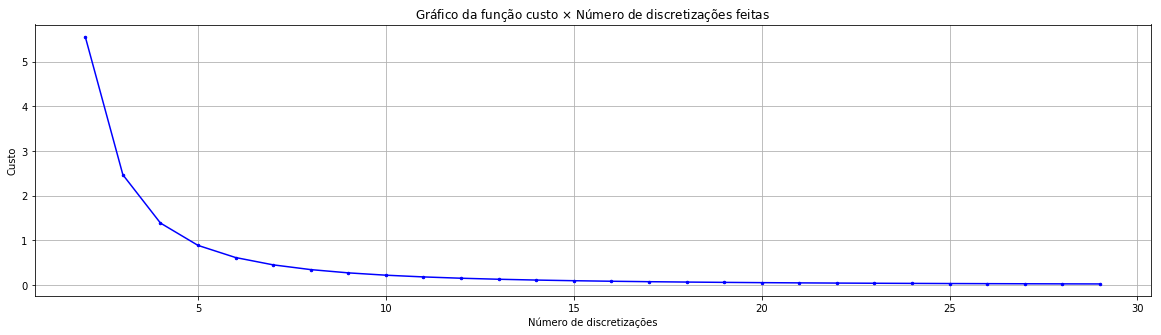

In [122]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(N, custos, 'bo-', markersize=2.5)
plt.title('Gráfico da função custo $\\times$ Número de discretizações feitas')
plt.ylabel('Custo')
plt.xlabel('Número de discretizações')
plt.show()